In [17]:
# using perceptron on iris dataset

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)
per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])

# Perceptron works like the stochastic gradientdescent
# infactperceptron is an SGD classifier with following hyperparameters
# loss="perceptron", learning_rate="constant", eta0=1(learning rate),penalty=None(no regularization)


In [18]:
print(y_pred)

# they just make a prediction on a hard threshold
# insteadof a class

[1]


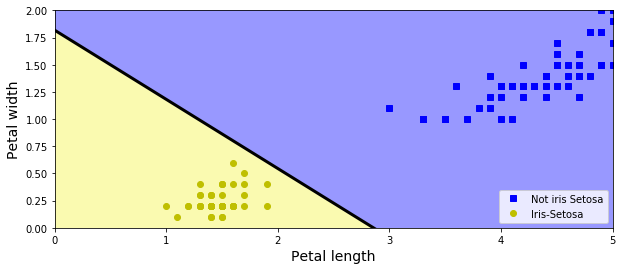

In [19]:
a = -per_clf.coef_[0][0]/ per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0,5,0,2]

x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1],500 ).reshape(-1,1),
            np.linspace(axes[2], axes[3],200).reshape(-1,1)    
)

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict= per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==0,0], X[y==0,1], "bs", label="Not iris Setosa")
plt.plot(X[y==1,0], X[y==1,1], "yo", label="Iris-Setosa")

plt.plot([axes[0],axes[1]],[a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff','#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend()
plt.axis(axes)

plt.show()

### Activation functions

In [6]:
# plotting various functions
# getting values of x

X = np.linspace(-4,4,20)
print(X)

[-4.         -3.57894737 -3.15789474 -2.73684211 -2.31578947 -1.89473684
 -1.47368421 -1.05263158 -0.63157895 -0.21052632  0.21052632  0.63157895
  1.05263158  1.47368421  1.89473684  2.31578947  2.73684211  3.15789474
  3.57894737  4.        ]


In [11]:
def step_fun(X):
#     if X>0:
#         return 1
#     elif X<0:
#         return -1
#     else:
#         return 0
    return np.sign(X)

def logit_fun(X):
    return 1/(1 + np.exp(-X))

def Tanh_fun(X):
#     return( 2 /(1 + np.exp(-4*X)) - 1)
    return np.tanh(X)

def ReLU_fun(X):
    return np.maximum(0,X)

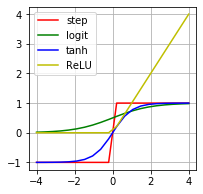

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.plot(X,step_fun(X), 'r', label="step")
plt.plot(X, logit_fun(X), 'g', label="logit")
plt.plot(X, Tanh_fun(X), 'b', label="tanh")
plt.plot(X, ReLU_fun(X), 'y', label="ReLU")
plt.legend()
plt.grid(True)
plt.show()


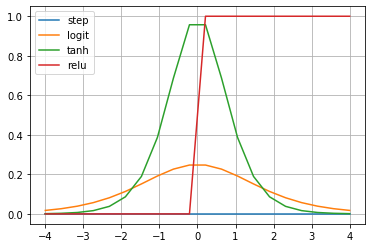

In [16]:
# derivative function

def derivative(f, z, eps=0.000001):
    return (f(z+eps) - f(z-eps))/(2*eps)

plt.plot(X, derivative(step_fun,X),label="step")
plt.plot(X,derivative(logit_fun, X), label="logit")
plt.plot(X, derivative(Tanh_fun, X), label="tanh")
plt.plot(X, derivative(ReLU_fun, X), label="relu")
plt.grid(True)
plt.legend()
plt.show()

### solving mlp XOR

In [22]:
# catering for heaviside and mlp_xor

def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 -0.5) -0.5)

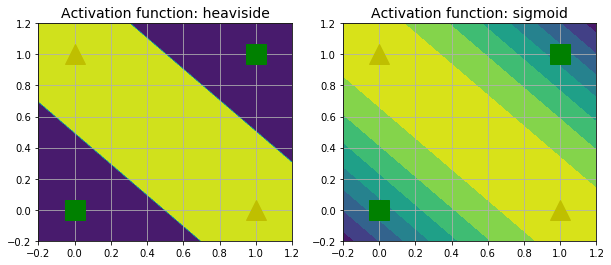

In [24]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)

x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=logit_fun)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1,x2,z1)
plt.plot([0,1], [0,1], "gs", markersize=20)
plt.plot([0,1], [1,0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0,1], [0,1], "gs", markersize=20)
plt.plot([0,1], [1,0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

### Training an MLP with Tensorflow high level API

In [2]:
# the simplest way to train an MLP is using TF.Learn
# we use the DNN classifier to train a deepneural network with any number of hidden layers
# and a softmax output layer to output estimated class probabilities
# For example training a DNN for classification
# to be done
import numpy as np
import tensorflow as tf

# importing mnist
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1,28 *28)/255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28)/ 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [3]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28*28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100],n_classes=10,
                                     feature_columns= feature_cols)
input_fn = tf.estimator.inputs.numpy_input_fn(
            x = {"X": X_train}, y=y_train, num_epochs=40,batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

W0522 10:02:41.380118 10712 estimator.py:1811] Using temporary folder as model directory: C:\Users\aonno\AppData\Local\Temp\tmpu_c33i0m
W0522 10:02:41.429573 10712 deprecation.py:323] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\training\training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0522 10:02:41.442537 10712 deprecation.py:323] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0522 10:02:41.444530 10712 deprecation.py:3

In [4]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
  x={"X": X_test}, y=y_test, shuffle=False  
)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

W0522 10:05:43.254403 10712 deprecation.py:323] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [5]:
eval_results

{'accuracy': 0.9792,
 'average_loss': 0.10219994,
 'loss': 12.936702,
 'global_step': 44000}

In [6]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

{'logits': array([ -1.4994787,  -3.0745378,  -0.9417098,   4.353701 ,  -7.343606 ,
        -11.039474 ,  -7.742324 ,  20.822414 ,  -5.0212674,  -0.892567 ],
       dtype=float32),
 'probabilities': array([2.0217371e-10, 4.1849062e-11, 3.5315145e-10, 7.0425251e-08,
        5.8567024e-13, 1.4539766e-14, 3.9308937e-13, 9.9999988e-01,
        5.9735394e-12, 3.7093983e-10], dtype=float32),
 'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object),
 'all_class_ids': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'all_classes': array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9'],
       dtype=object)}

### using plain tensorflow

In [7]:
import tensorflow as tf

n_inputs = 28*28  #mnist
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [11]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [12]:
reset_graph()

X = tf.placeholder(tf.float32,shape=(None, n_inputs),name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [13]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev )
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X,W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z
        

In [14]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [15]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [16]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [17]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [19]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [20]:
n_epochs = 40
batch_size = 50

In [21]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch,y_batch

In [22]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X:X_batch,y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X:X_batch,y: y_batch})
        acc_val = accuracy.eval(feed_dict={X:X_valid, y:y_valid})
        print(epoch, "Batch accuracy: ", acc_batch,"Val accuracy: ",acc_val)
        
    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy:  0.9 Val accuracy:  0.9146
1 Batch accuracy:  0.92 Val accuracy:  0.936
2 Batch accuracy:  0.96 Val accuracy:  0.945
3 Batch accuracy:  0.92 Val accuracy:  0.9512
4 Batch accuracy:  0.98 Val accuracy:  0.9558
5 Batch accuracy:  0.96 Val accuracy:  0.9566
6 Batch accuracy:  1.0 Val accuracy:  0.9612
7 Batch accuracy:  0.94 Val accuracy:  0.9628
8 Batch accuracy:  0.98 Val accuracy:  0.965
9 Batch accuracy:  0.96 Val accuracy:  0.9658
10 Batch accuracy:  0.92 Val accuracy:  0.9686
11 Batch accuracy:  0.98 Val accuracy:  0.9688
12 Batch accuracy:  0.98 Val accuracy:  0.967
13 Batch accuracy:  0.98 Val accuracy:  0.9708
14 Batch accuracy:  1.0 Val accuracy:  0.9712
15 Batch accuracy:  0.94 Val accuracy:  0.973
16 Batch accuracy:  1.0 Val accuracy:  0.9732
17 Batch accuracy:  1.0 Val accuracy:  0.9742
18 Batch accuracy:  1.0 Val accuracy:  0.9744
19 Batch accuracy:  0.98 Val accuracy:  0.975
20 Batch accuracy:  1.0 Val accuracy:  0.9754
21 Batch accuracy:  1.0 Val accuracy

In [24]:
# for later execution start eith this cell

with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") 
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

In [25]:
print("predicted classes: ", y_pred)
print("actual classes: ", y_test[:20])

predicted classes:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
actual classes:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [28]:
%tensorboard --logdir logs/train

UsageError: Line magic function `%tensorboard` not found.


In [29]:
!pip install jupyter-tensorboard

  Created wheel for jupyter-tensorboard: filename=jupyter_tensorboard-0.2.0-py2.py3-none-any.whl size=15266 sha256=38b252c20decea15e7350d869c7080c52761fe8b7949a5de1ceaa6a0f485272c
  Stored in directory: C:\Users\aonno\AppData\Local\pip\Cache\wheels\fb\64\e7\40c0949a4c8604b75cf901a7791c30f0308dac5afe0ecc4ce3
Successfully built jupyter-tensorboard


In [33]:
from tensorflow_graph_in_jupyter import show_graph

# not able to get tensorboard going

ModuleNotFoundError: No module named 'tensorflow_graph_in_jupyter'

In [34]:
#using in the above dense instead of neuron custom layer

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                          activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                          activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs,name="outputs")
    y_proba = tf.nn.softmax(logits)


W0522 11:32:53.380227 10712 deprecation.py:323] From <ipython-input-34-63b00592a015>:5: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


In [35]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [36]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    

In [37]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [38]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train,batch_size ):
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        acc_batch = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_valid = accuracy.eval(feed_dict={X:X_valid, y:y_valid})
        print(epoch, "Batch accuracy: ", acc_batch, "Validation accuracy: ", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy:  0.88 Validation accuracy:  0.9
1 Batch accuracy:  0.92 Validation accuracy:  0.923
2 Batch accuracy:  0.86 Validation accuracy:  0.931
3 Batch accuracy:  0.96 Validation accuracy:  0.9392
4 Batch accuracy:  0.98 Validation accuracy:  0.9442
5 Batch accuracy:  0.92 Validation accuracy:  0.9496
6 Batch accuracy:  0.98 Validation accuracy:  0.9526
7 Batch accuracy:  0.96 Validation accuracy:  0.9564
8 Batch accuracy:  0.96 Validation accuracy:  0.9598
9 Batch accuracy:  0.96 Validation accuracy:  0.9624
10 Batch accuracy:  0.94 Validation accuracy:  0.9658
11 Batch accuracy:  0.98 Validation accuracy:  0.965
12 Batch accuracy:  0.96 Validation accuracy:  0.9668
13 Batch accuracy:  1.0 Validation accuracy:  0.9682
14 Batch accuracy:  1.0 Validation accuracy:  0.9684
15 Batch accuracy:  0.96 Validation accuracy:  0.9722
16 Batch accuracy:  1.0 Validation accuracy:  0.973


In [ ]:
from 